<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/curse_of_dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [41]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial
from tqdm import tqdm
import textwrap

### **Read In Data Set**

In [42]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Functions**

In [43]:
def closest_distance(matrix, i, k):
    # Calculate the difference between each row in the matrix and the target row (excluding itself)
    differences = matrix - matrix[i]

    # Compute the Euclidean distance for each row
    distances = jnp.linalg.norm(differences, axis=1)

    # Set the distance of the selected row to infinity to exclude it
    distances = distances.at[i].set(jnp.inf)

    # Sort distances and select the k-th closest distance (adjusting for 0-based index)
    kth_distance = jnp.sort(distances)[k - 1]

    return kth_distance

def avg_closest_distance(matrix, k):
  ids = jnp.arange(0, matrix.shape[0])
  distance = jax.vmap(partial(closest_distance, matrix, k=k))(ids)
  return jnp.mean(distance)

### **For-loop**

In [49]:
continuous_df = df.loc[:, 'students':'math']
#continuous_df = (continuous_df - continuous_df.min()) / (continuous_df.max() - continuous_df.min())
continuous_df = (continuous_df - continuous_df.mean()) / continuous_df.std()
Results = {}
rs = range(1, 20, 2)
for i in tqdm(rs):
  results = []
  for column in continuous_df.columns:
    matrix = jnp.array(continuous_df.loc[:, 'students':column].values)
    ans = avg_closest_distance(matrix, i)
    results.append(ans)
  Results[i] = results


100%|██████████| 10/10 [00:03<00:00,  2.67it/s]


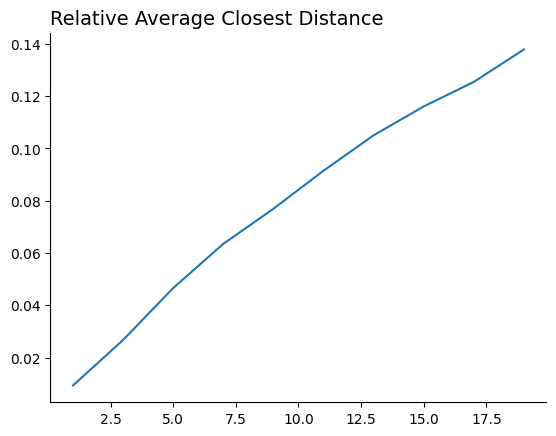

In [70]:
y_values = [i[0] for i in list(Results.values())]
plt.plot(list(rs), y_values)
plt.title('Relative Average Closest Distance', loc='left', size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [71]:
df.shape

(420, 16)

### **Plot**

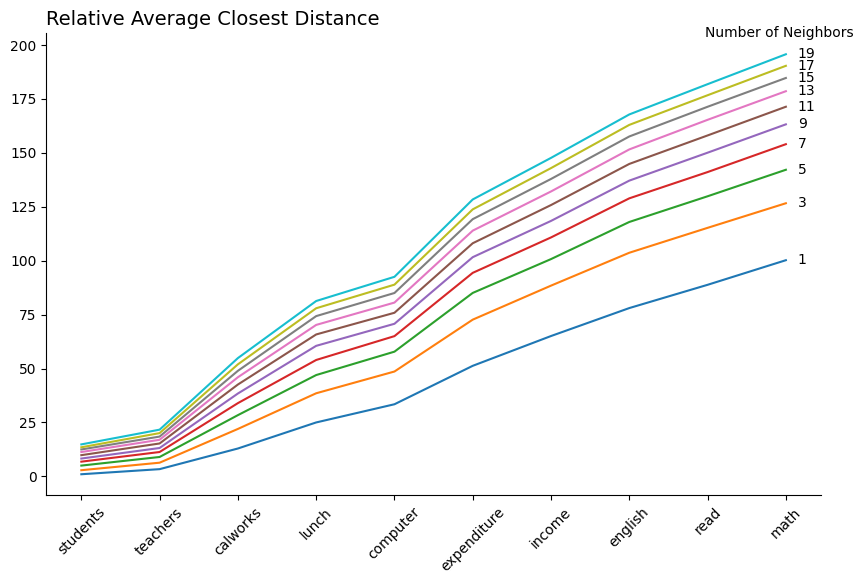

In [50]:
plt.figure(figsize=(10, 6))

# Plot each line and annotate the end with the label
for i in rs:
    y_values = np.array(Results[i]) / Results[1][0]
    plt.plot(continuous_df.columns, y_values)

    # Annotate the end of each line
    note = f"{i}"  # Customize or use `i` or another label as needed
    plt.annotate(
        textwrap.fill(note, width=120),
        xy=(.97, y_values[-1]),  # Set x to 1 (end of x-axis), y to last y value in the series
        xycoords=('axes fraction', 'data'),  # Position relative to axis and data
        ha='left',
        va="center",
        fontsize=10
    )
plt.annotate(
    textwrap.fill('Number of Neighbors', width=120),
    xy=(0.85, y_values[-1]+ 10),  # Set x to 1 (end of x-axis), y to last y value in the series
    xycoords=('axes fraction', 'data'),  # Position relative to axis and data
    ha='left',
    va="center",
    fontsize=10
)
plt.title('Relative Average Closest Distance', loc='left', size=14)
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [51]:
Results[19]

[Array(0.13788284, dtype=float32),
 Array(0.20138572, dtype=float32),
 Array(0.50977856, dtype=float32),
 Array(0.75568366, dtype=float32),
 Array(0.8600178, dtype=float32),
 Array(1.1932893, dtype=float32),
 Array(1.3724034, dtype=float32),
 Array(1.5595746, dtype=float32),
 Array(1.6899836, dtype=float32),
 Array(1.8189259, dtype=float32)]

In [52]:
Results[1]

[Array(0.00929477, dtype=float32),
 Array(0.031246, dtype=float32),
 Array(0.12020793, dtype=float32),
 Array(0.2324965, dtype=float32),
 Array(0.31085715, dtype=float32),
 Array(0.47647932, dtype=float32),
 Array(0.6048307, dtype=float32),
 Array(0.72531545, dtype=float32),
 Array(0.8255114, dtype=float32),
 Array(0.9315467, dtype=float32)]